Object Detection in the image using RCNN

BTech AI , Nihar Lohar

In [ ]:
!pip install -q torchvision opencv-python pillow


In [ ]:
import torch
import torchvision
from torchvision import transforms as T
import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
import os
print("torch:", torch.__version__, "torchvision:", torchvision.__version__)

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella',
    'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase',
    'scissors', 'teddy bear', 'hair drier', 'toothbrush','beagle'
]


torch: 2.8.0+cu126 torchvision: 0.23.0+cu126


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.to(device)
model.eval()
print("Model loaded on", device)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:01<00:00, 137MB/s]


Model loaded on cuda


In [ ]:
def draw_boxes(pil_img, boxes, labels, scores, show_scores=True):
    img = pil_img.copy()
    draw = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype("DejaVuSans.ttf", 16)
    except:
        font = ImageFont.load_default()

    for box, label, score in zip(boxes, labels, scores):
        x1, y1, x2, y2 = map(int, box)
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

        text = COCO_INSTANCE_CATEGORY_NAMES[label]
        if show_scores:
            text = f"{text}: {score:.2f}"

        bbox = draw.textbbox((0, 0), text, font=font)
        text_w, text_h = bbox[2] - bbox[0], bbox[3] - bbox[1]

        draw.rectangle([x1, y1 - text_h - 4, x1 + text_w + 6, y1], fill="red")
        draw.text((x1 + 3, y1 - text_h - 2), text, fill="white", font=font)

    return img


In [ ]:
def load_image_into_pil(image_source):
    """Loads an image from a file path or bytes into a PIL Image object."""
    if isinstance(image_source, bytes):
        return Image.open(io.BytesIO(image_source)).convert("RGB")
    elif isinstance(image_source, str) and os.path.exists(image_source):
        return Image.open(image_source).convert("RGB")
    else:
        raise TypeError("image_source must be bytes or a valid file path")

def get_predictions(pil_img, threshold=0.5):
    """Gets object detection predictions from a PIL Image."""
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(pil_img).to(device)
    with torch.no_grad():
        prediction = model([img_tensor])
    boxes = prediction[0]['boxes'][prediction[0]['scores'] > threshold]
    labels = prediction[0]['labels'][prediction[0]['scores'] > threshold]
    scores = prediction[0]['scores'][prediction[0]['scores'] > threshold]
    return boxes, labels, scores

Detected objects: [('microwave', 0.987992525100708), ('bowl', 0.9696706533432007), ('cup', 0.8493915796279907), ('spoon', 0.8366386890411377), ('bowl', 0.8355079889297485), ('spoon', 0.7402758002281189), ('cup', 0.7042798399925232)]


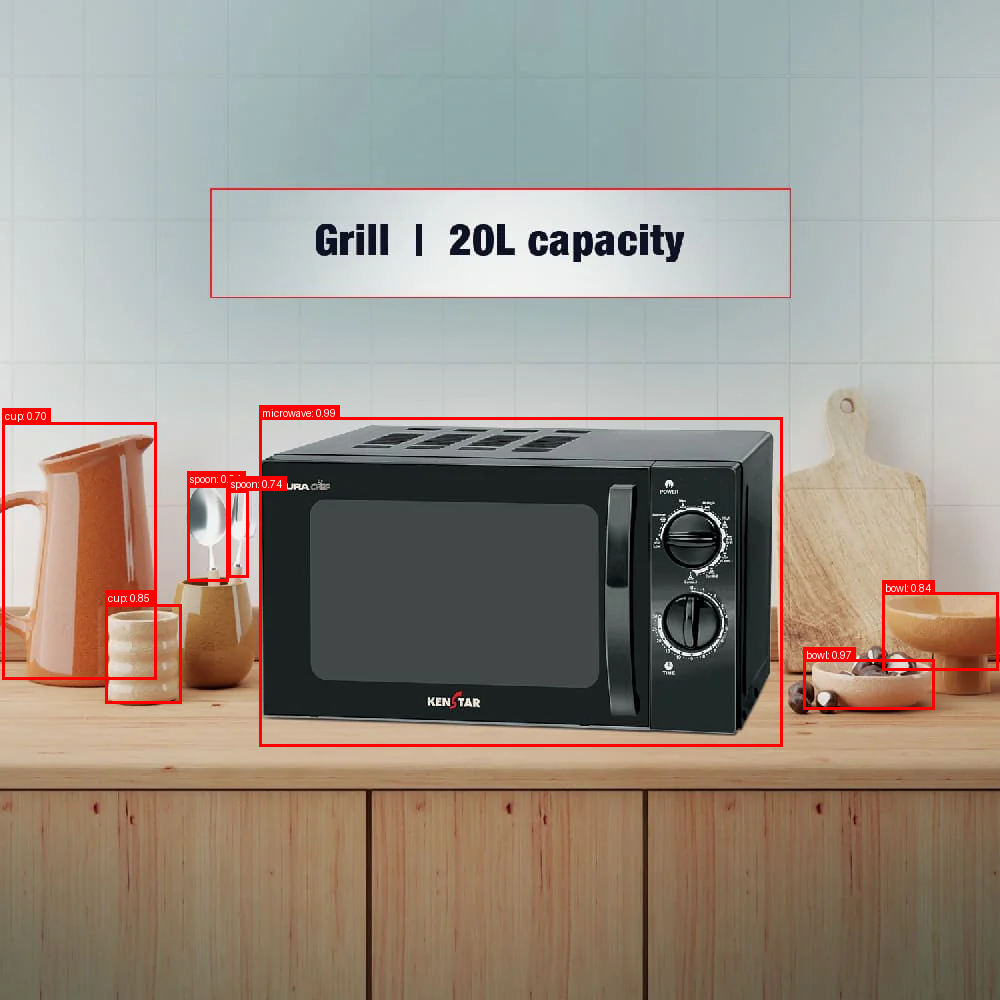

In [ ]:
path = "/content/Micro-Grill-20L_1.webp"

if os.path.exists(path):
    pil_img = load_image_into_pil(path)
    boxes, labels, scores = get_predictions(pil_img, threshold=0.5)
    print("Detected objects:", [(COCO_INSTANCE_CATEGORY_NAMES[l], float(s)) for l, s in zip(labels, scores)])
    out_img = draw_boxes(pil_img, boxes, labels, scores)
    display(out_img)
else:
    print(" File not found! Check your path.")


Detected objects: [('teddy bear', 0.9979732632637024), ('teddy bear', 0.8249116539955139), ('bed', 0.7120035290718079), ('teddy bear', 0.7090792059898376), ('teddy bear', 0.5295995473861694)]


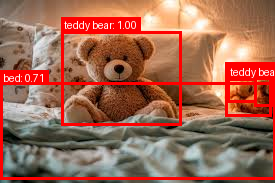

In [ ]:
path = "/content/download (1).jpg"

if os.path.exists(path):
    pil_img = load_image_into_pil(path)
    boxes, labels, scores = get_predictions(pil_img, threshold=0.5)
    print("Detected objects:", [(COCO_INSTANCE_CATEGORY_NAMES[l], float(s)) for l, s in zip(labels, scores)])
    out_img = draw_boxes(pil_img, boxes, labels, scores)
    display(out_img)
else:
    print(" File not found! Check your path.")


Detected objects: [('person', 0.9976676106452942), ('baseball bat', 0.9839767217636108)]


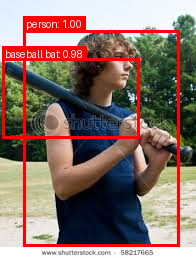

In [ ]:
path = "/content/images (4).jpg"

if os.path.exists(path):
    pil_img = load_image_into_pil(path)
    boxes, labels, scores = get_predictions(pil_img, threshold=0.5)
    print("Detected objects:", [(COCO_INSTANCE_CATEGORY_NAMES[l], float(s)) for l, s in zip(labels, scores)])
    out_img = draw_boxes(pil_img, boxes, labels, scores)
    display(out_img)
else:
    print(" File not found! Check your path.")
